In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


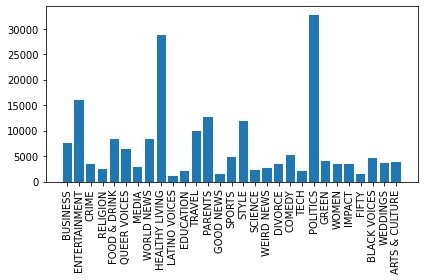

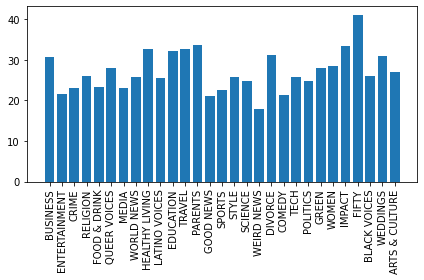

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number_of_articles_per_category.png')
plt.show()

fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Words_per_category.png')
plt.show()


In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:3
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [5]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    list_of_sentences.append(sentences)
    labels.append(label)
    '''for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)'''
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



200882


In [6]:
'''from sentence_transformers import SentenceTransformer
model = SentenceTransformer("paraphrase-distilroberta-base-v1", device = "cuda:2")
embeddings = model.encode(list_of_sentences)
#print(category_plus_news_list[0][1])
print(embeddings.shape)'''



'from sentence_transformers import SentenceTransformer\nmodel = SentenceTransformer("paraphrase-distilroberta-base-v1", device = "cuda:2")\nembeddings = model.encode(list_of_sentences)\n#print(category_plus_news_list[0][1])\nprint(embeddings.shape)'

In [7]:
from sentence_transformers import SentenceTransformer, models, InputExample, losses

word_embedding_model = models.Transformer('distilbert-base-uncased', max_seq_length=512)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=512, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model], device = "cuda:3")

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

num_examples = 1000

list_to_fine_tune_1 = []

for num in range(num_examples):
    
    list_to_fine_tune_1.append(randomChoice(category_plus_news_list))
    
#print(list_to_fine_tune_1[0:10])
#print(list_to_fine_tune_2[0:10])

In [8]:
import itertools

train_samples=[]

for pair in itertools.combinations(list_to_fine_tune_1,2):
    
    if (pair[0][0]==pair[1][0]):
        
        inp_example = InputExample(texts=[pair[0][1], pair[1][1]], label=1.0)
        
    else:
        inp_example = InputExample(texts=[pair[0][1], pair[1][1]], label=0.0)
   
    train_samples.append(inp_example)
    
#print(train_samples)'''

In [9]:
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging

#train_samples =[]

train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model=model)



In [10]:
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/31219 [00:00<?, ?it/s]

In [11]:
embeddings = model.encode(list_of_sentences, show_progress_bar = True)
print(embeddings.shape)

Batches:   0%|          | 0/6278 [00:00<?, ?it/s]

(200882, 512)


In [12]:
# Normalalise the input vectors v = (v - mean) / std

#embeddings -= embeddings.mean(0)
#embeddings /= embeddings.std(0)

In [13]:
'''from gensim.test.utils import common_texts
from gensim.models import Word2Vec

sentences = list(category_news.keys())

def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

corpus = to_matrix(sentences, 1)
#print(corpus)

model = Word2Vec(sentences=corpus, size=300, window=5, min_count=1, workers=4)
model.save("word2vec.model")

vector = model.wv['ARTS & CULTURE']
#print(vector)'''

'from gensim.test.utils import common_texts\nfrom gensim.models import Word2Vec\n\nsentences = list(category_news.keys())\n\ndef to_matrix(l, n):\n    return [l[i:i+n] for i in range(0, len(l), n)]\n\ncorpus = to_matrix(sentences, 1)\n#print(corpus)\n\nmodel = Word2Vec(sentences=corpus, size=300, window=5, min_count=1, workers=4)\nmodel.save("word2vec.model")\n\nvector = model.wv[\'ARTS & CULTURE\']\n#print(vector)'

In [14]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[value]=idx

print(index_class_map_dict)

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [15]:
embedded_sentences = []

for index, embedding in enumerate(embeddings):
    input_vector = embedding
    target_vector = labels[index]
    target_class = index_class_map_dict[target_vector]
    #target_vector = model.wv[labels[index]]
    embedded_sentences.append((input_vector, target_class))

    
#print(embedded_sentences[0][1])

In [16]:
'''label_list = list(category_news.keys())

for label in labels:
    for idx, value in enumerate(label_list):
        if label == value:
            labels[labels.index(label)] = idx'''
            


'label_list = list(category_news.keys())\n\nfor label in labels:\n    for idx, value in enumerate(label_list):\n        if label == value:\n            labels[labels.index(label)] = idx'

In [17]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)
    
    

[(0, 'BUSINESS'), (1, 'ENTERTAINMENT'), (2, 'CRIME'), (3, 'RELIGION'), (4, 'FOOD & DRINK'), (5, 'QUEER VOICES'), (6, 'MEDIA'), (7, 'WORLD NEWS'), (8, 'HEALTHY LIVING'), (9, 'LATINO VOICES'), (10, 'EDUCATION'), (11, 'TRAVEL'), (12, 'PARENTS'), (13, 'GOOD NEWS'), (14, 'SPORTS'), (15, 'STYLE'), (16, 'SCIENCE'), (17, 'WEIRD NEWS'), (18, 'DIVORCE'), (19, 'COMEDY'), (20, 'TECH'), (21, 'POLITICS'), (22, 'GREEN'), (23, 'WOMEN'), (24, 'IMPACT'), (25, 'FIFTY'), (26, 'BLACK VOICES'), (27, 'WEDDINGS'), (28, 'ARTS & CULTURE')]


In [18]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)


label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value

print(index_class_map_dict.keys())

    

[(0, 'BUSINESS'), (1, 'ENTERTAINMENT'), (2, 'CRIME'), (3, 'RELIGION'), (4, 'FOOD & DRINK'), (5, 'QUEER VOICES'), (6, 'MEDIA'), (7, 'WORLD NEWS'), (8, 'HEALTHY LIVING'), (9, 'LATINO VOICES'), (10, 'EDUCATION'), (11, 'TRAVEL'), (12, 'PARENTS'), (13, 'GOOD NEWS'), (14, 'SPORTS'), (15, 'STYLE'), (16, 'SCIENCE'), (17, 'WEIRD NEWS'), (18, 'DIVORCE'), (19, 'COMEDY'), (20, 'TECH'), (21, 'POLITICS'), (22, 'GREEN'), (23, 'WOMEN'), (24, 'IMPACT'), (25, 'FIFTY'), (26, 'BLACK VOICES'), (27, 'WEDDINGS'), (28, 'ARTS & CULTURE')]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])


In [19]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

In [42]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [43]:
import math 
class SNNLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size)
        nn.init.normal_(self.fc.weight, std = math.sqrt(1/input_size))
        
    def forward(self, inputs):
        return self.fc(inputs)
    

In [44]:
 
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
class NN(nn.Module):
    """ Simple NN architecture with 2 fully connected layers
        and SeLU activation """
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        fc1 = SNNLinear(input_size, hidden_size)
        #fc2 = SNNLinear(hidden_size, hidden_size//2)
        fc2 = SNNLinear(hidden_size, output_size)
        
        self.net = nn.Sequential(fc1, nn.SELU(), nn.AlphaDropout(0.2), fc2) 
                                
        
    def forward(self, input):
        return self.net(input)

    
print(device)

cuda:3


In [45]:
def train(input_tensor, target_tensor, model, model_optimizer, criterion):
    model.train()
    
    model_optimizer.zero_grad()

    input_length = input_tensor.shape
    target_length = target_tensor.shape
    
    output = model(input_tensor)
        
    loss = criterion(output, target_tensor)
    loss.backward()
    
    model_optimizer.step()
    
    return output, loss.item()

In [46]:
def _eval(input_tensor, target_tensor, model, model_optimizer, criterion):
    model.eval()
    
    with torch.no_grad():

        input_length = input_tensor.shape
        target_length = target_tensor.shape
        output = model(input_tensor)

        loss = criterion(output, target_tensor)

    return output, loss.item()

In [47]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [48]:
#num_of_items_per_class = [16190, 28174, 6225, 4639, 15121, 12507, 5055, 16220, 63001, 2184, 4475, 21371, 29184, 2362, 8805, 22697, 4004, 4455, 7192, 8959, 4197, 62419, 7674, 7391, 7408, 3792, 8854, 7535, 7152]
num_of_items_per_class = [7645, 16059, 3406, 2557, 8323, 6315, 2816, 8421, 28717, 1130, 2149, 9888, 12633, 1399, 4885, 11904, 2179, 2671, 3427, 5176, 2083, 32740, 3946, 3491, 3460, 1402, 4529, 3652, 3879]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
#print(len(weights))

class_weights = torch.FloatTensor(weights).to(device)

In [49]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, list_of_data):
        self.list_of_data = list_of_data

    # get one sample
    def __getitem__(self, idx):
        
        sample = self.list_of_data[idx]
        input_tensor = torch.from_numpy(sample[0]).float()
        target_tensor = torch.tensor(sample[1])
    
        return input_tensor, target_tensor

    def __len__(self):
        return len(self.list_of_data)
    
dataset = Dataset(embedded_sentences)

_input, _target = dataset.__getitem__(0)
print(_input.shape, _target.shape)


val_size = 0.1
test_size = 0.1

test_amount, val_amount = int(dataset.__len__() * test_size), int(dataset.__len__() * val_size)
print(test_amount, val_amount)

train_set, val_set, test_set = torch.utils.data.random_split(dataset, [
            (dataset.__len__() - (test_amount + val_amount)), 
            test_amount, 
            val_amount
])


train_dataloader = torch.utils.data.DataLoader(
            train_set,
            batch_size=128,
            shuffle=True,
)
val_dataloader = torch.utils.data.DataLoader(
            val_set,
            batch_size=128,
            shuffle=False,
)
test_dataloader = torch.utils.data.DataLoader(
            test_set,
            batch_size=128,
            shuffle=False,
)


torch.Size([512]) torch.Size([])
20088 20088


In [50]:
from torch.optim.lr_scheduler import *

learning_rate = 1e-4
def trainIters(model, n_iters, embedded, val_embedded, print_every, learning_rate=learning_rate):
    start = time.time()
    plot_losses_train = []
    plot_losses_val =[]
    print_loss_total_train = 0  # Reset every print_every
    plot_loss_total_train = 0  # Reset every plot_every
    
    print_loss_total_val = 0  # Reset every print_every
    plot_loss_total_val = 0  # Reset every plot_every
    
    print_acc_total_train = 0
    plot_acc_total_train = 0
    plot_acc_train = []
    
    print_acc_total_val = 0
    plot_acc_total_val = 0
    plot_acc_val = []
    
    train_epochs = []
    val_epochs = []

    #TODO: Try ADAM
    model_optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-5)
    
    #TODO: Learning rate scheduler
    scheduler = StepLR(model_optimizer, step_size=50, gamma=0.1)
    
    criterion = nn.CrossEntropyLoss(weight = class_weights)
    
    total_steps = n_iters*len(embedded)
    
    for epoch in range(n_iters):
                
        for local_step, (_input, _target) in enumerate(embedded, 1):

            input_tensor = _input.to(device)
            noise = torch.randn_like(input_tensor) * 1e-5 
            input_tensor = input_tensor + noise
            target_tensor = _target.to(device)

            output, loss = train(input_tensor, target_tensor, model,
             model_optimizer, criterion)
            
            accuracy = (output.argmax(-1) == target_tensor).float().sum()

            print_loss_total_train += loss
            plot_loss_total_train += loss
            print_acc_total_train += accuracy
            plot_acc_total_train += accuracy
            

            global_step = epoch * len(embedded) + local_step

            if global_step % print_every == 0:
                print_loss_avg_train = print_loss_total_train / print_every
                print_loss_total_train = 0
        
                print('%s (%d %d%%) train_loss = %.4f' % (timeSince(start, global_step / total_steps),
                                             global_step, global_step / total_steps * 100, print_loss_avg_train))

    
        plot_loss_avg_train = plot_loss_total_train / len(embedded)
        plot_losses_train.append(plot_loss_avg_train)
        
        plot_avg_acc_train = plot_acc_total_train / len(embedded)
        plot_acc_train.append(plot_avg_acc_train)
        
        plot_loss_total_train = 0
        plot_acc_total_train = 0
        
        train_epochs.append(epoch)


        if epoch % 5 == 0:


            for (_input, _target) in val_embedded:

                input_tensor = _input.to(device)
                target_tensor = _target.to(device)

                output, loss = _eval(input_tensor, target_tensor, model,
                             model_optimizer, criterion)

                accuracy = (output.argmax(-1) == target_tensor).float().sum()

                print_loss_total_val += loss
                plot_loss_total_val += loss
                print_acc_total_val += accuracy
                plot_acc_total_val += accuracy


            print_loss_avg_val = print_loss_total_val / len(val_embedded)
            print_loss_total_val = 0
            
            print_avg_acc = print_acc_total_val/ val_amount
            print_acc_total_val = 0
           
            print('val_loss = %.4f acc = %.4f' % (print_loss_avg_val, print_avg_acc))

            plot_loss_avg_val = plot_loss_total_val / len(val_embedded)
            plot_avg_acc_val = plot_acc_total_val / val_amount
            
            
            
            plot_losses_val.append(plot_loss_avg_val)
            plot_acc_val.append(plot_avg_acc_val)
            
            plot_loss_total_val = 0
            plot_acc_total_val = 0
            val_epochs.append(epoch)
       
        #scheduler.step()
        

    #print(train_epochs)
    #print(val_epochs)
    
    import matplotlib.pyplot as plt
    plt.switch_backend('agg')
    import matplotlib.ticker as ticker
    import numpy as np


    plt.figure(figsize=(10,10))
    plt.plot(train_epochs, plot_losses_train, linewidth=5)
    plt.plot(val_epochs, plot_losses_val, linewidth=5)
    plt.legend(['train loss', 'val loss'], loc = 'upper right')
    plt.savefig('loss-sbert.png')
    plt.show()

    plt.figure(figsize=(10,10))
    plt.plot(val_epochs, plot_acc_val, linewidth =5)
    plt.legend(['val_acc'], loc = 'upper right')
    plt.savefig('acc-sbert.png')
    plt.show()

In [51]:
hidden_size = 256
input_size = embeddings.shape[1]
output_size = 29

model = NN(input_size, hidden_size, output_size).to(device)
learning_rate = 1e-4
#Note : may need more epochs range [100-300]
epochs = 150


val_loss = 2.1399 acc = 0.5951
0m 20s (- 12m 24s) (5000 2%) train_loss = 2.0738
val_loss = 2.0207 acc = 0.5974
0m 44s (- 13m 11s) (10000 5%) train_loss = 1.9275
val_loss = 1.9564 acc = 0.5975
1m 8s (- 13m 8s) (15000 7%) train_loss = 1.8709
1m 32s (- 12m 55s) (20000 10%) train_loss = 1.8317
val_loss = 1.9217 acc = 0.5974
1m 51s (- 12m 11s) (25000 13%) train_loss = 1.8020
val_loss = 1.8975 acc = 0.6012
2m 12s (- 11m 41s) (30000 15%) train_loss = 1.7794
val_loss = 1.8875 acc = 0.5987
2m 33s (- 11m 14s) (35000 18%) train_loss = 1.7618
val_loss = 1.8631 acc = 0.5984
2m 54s (- 10m 49s) (40000 21%) train_loss = 1.7459
3m 16s (- 10m 25s) (45000 23%) train_loss = 1.7340
val_loss = 1.8563 acc = 0.6010
3m 39s (- 10m 6s) (50000 26%) train_loss = 1.7203
val_loss = 1.8336 acc = 0.5946
3m 58s (- 9m 39s) (55000 29%) train_loss = 1.7102
val_loss = 1.8274 acc = 0.5977
4m 20s (- 9m 17s) (60000 31%) train_loss = 1.7009
val_loss = 1.8286 acc = 0.5971
4m 41s (- 8m 53s) (65000 34%) train_loss = 1.6905
5m 4s 

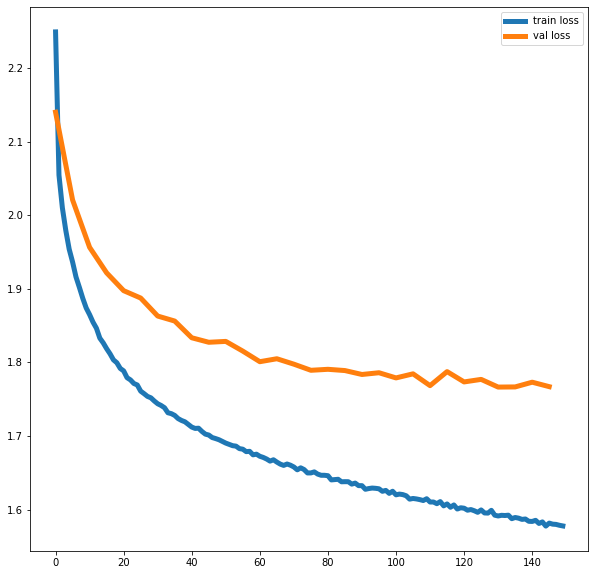

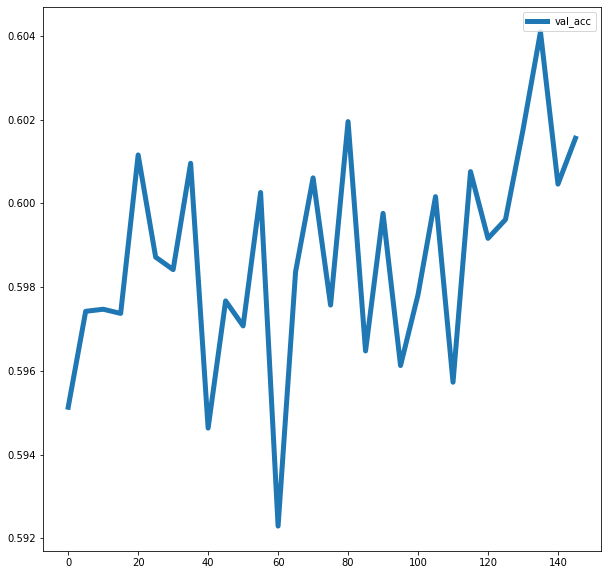

In [52]:
from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment1')

trainIters(model, epochs, train_dataloader, val_dataloader, print_every=5000, learning_rate = learning_rate)